# **Software for Analytics**

## Exploratory data analysis (EDA) project

## Introduction 

This EDA project aims to understand vaccination trends and status in the United Kingdom. The analysis was carried out with provided UK vaccination data. The analysis was conducted using a variety of visualisation techniques, Descriptive statistics, hypothesis testing, and the development of a linear regression model.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#magic function for diplaying plot in the notebook
%matplotlib inline

Using the above code, python libraries are included for the project developmant and execution

In [2]:
# read the excel Dataset file
df=pd.read_excel("UK_VaccinationsData.xlsx")
df.head() # Display the first five rows

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0
3,England,E92000001,2022.0,5,Q2,Fri,Yes,5818.0,5529.0,10692.0
4,England,E92000001,2022.0,5,Q2,Thu,Yes,8439.0,6968.0,11701.0


Here we are reading the excel file of UK Vaccination dataset that is being used for the analysis

### 1. Generate descriptive statistics for the dataset, and comment on the main trends.

In [3]:
'''This function returns the mean, Standard deviation,
            minimum and maximum values etc.'''
df.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,903.000000,904.000000,900.000000,901.000000,898.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915
min,2021.000000,1.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000


1. There is around 900 records in the UK Vaccination dataset.
2. An average number of people who have taken their first, second and third dosage are around 4,995; 5,575 and 42,530
3. For first, second and third dose the mean value is greater than median value, this states that it is positively skewed (right skewed).
4. The maximum dosage was taken in the year 2022 on month of December, the minimum dosage was taken on January 2021.
5. Maximum number of people who have taken the first dose on a single day are 1,15,551. Similarly 48,491 and 8,30,403 people took the second and the third dose respectively.

### 2. Check any records with missing values and handle the missing data as appropriate.

In [4]:
# Checks for empty places in each column and return the count
df.isnull().sum()

areaName      0
areaCode      0
year          1
month         0
Quarter       1
day           1
WorkingDay    2
FirstDose     4
SecondDose    3
ThirdDose     6
dtype: int64

In [5]:
# Delete the row where there is empty places
df.dropna(inplace=True)

In [6]:
# Rechecking if there is any empty cells
df.isnull().sum()

areaName      0
areaCode      0
year          0
month         0
Quarter       0
day           0
WorkingDay    0
FirstDose     0
SecondDose    0
ThirdDose     0
dtype: int64

1. In this part, the data set has been detected with invaled and missing values.
2. using the dropna() function the records with missing values are been removed from the dataset for analysis.

### 3. A. the distribution of one or more individual continuous variables

Text(0.5, 1.0, 'Distribution of number of people taken first dose')

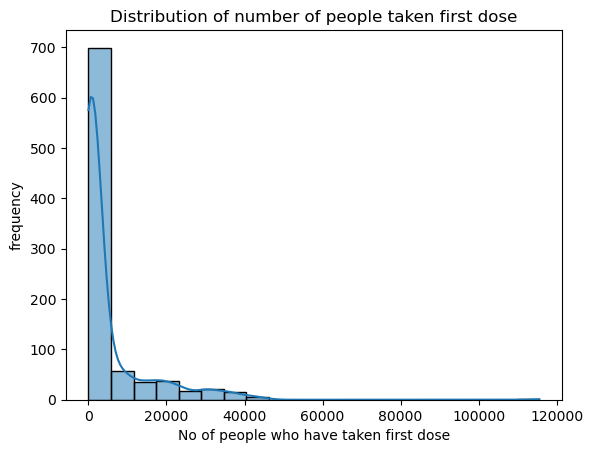

In [7]:
'''plotting the distribution of number of people 
who have taken first dosage using Seaborn '''

sns.histplot(df['FirstDose'], bins=20, kde=True)
# add x/y labels
plt.xlabel("No of people who have taken first dose") 
plt.ylabel("frequency")
# add title
plt.title("Distribution of number of people taken first dose")

1. The histogram shows that distribution of number of people who have taken first dosage during the years 2021 and 2022. 
2. The graph is positively skewed, the number of people who have taken first dosage are mostly around 10,000 people in a day and gradually decreasing.
3. By looking into above graph there was few days where around 80,000 doses were taken in a single day.

### 3. B. the relationship of a pair of continuous variables.

Text(0.5, 1.0, 'No of people how have taken first dose vs second dose')

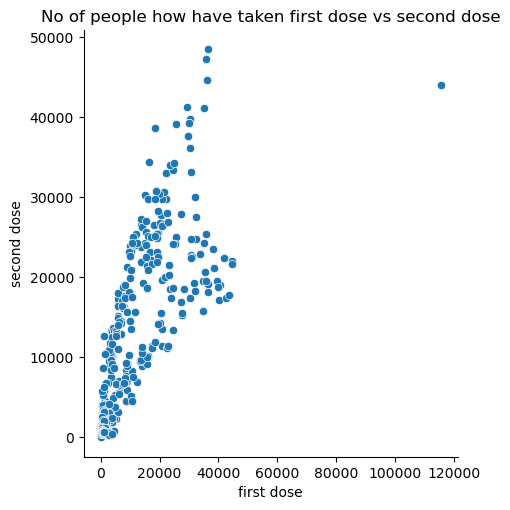

In [8]:
'''creating a scatter plot showing the relationship between the 
        number of people who have taken first and second dosages'''

sns.relplot(x='FirstDose', y = 'SecondDose',  data=df)
# add x/y labels
plt.xlabel("first dose")
plt.ylabel("second dose")
# add title
plt.title("No of people how have taken first dose vs second dose")

1. The above graphs shows the relationship between the number of people who have take the first dosage and second dosage.
2. There is a strong positive correlation between them. This states that when number of people who have taken first dose increases, the number of people who have taken second dose also increases.
3. From this we can conclude that people who have taken the first dose are more likely to get the second dosage as well.

### C. the association b/w a categorical variable and a continuous one.

Text(0.5, 1.0, 'No of people who have taken first dose of vaccination for each month in UK')

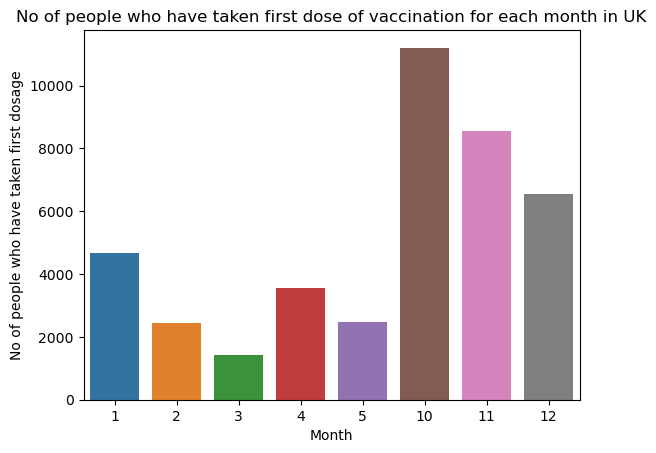

In [9]:
'''creating a bar plot showing the number of people 
            who took first dose in each month'''

sns.barplot(x='month', y = 'FirstDose',  data=df,errorbar=None)
# add x/y labels
plt.xlabel("Month")
plt.ylabel("No of people who have taken first dosage")
# add title
plt.title("No of people who have taken first dose"
          " of vaccination for each month in UK")

1. The number of people who have taken first dosage tend to be more in september followed by October, November and December.
2. The lowest number of people who took first dosage was during March.
3. The Number of people taken first dose tends to be low in the first half of the year and tend to reach peak in september and gradually decreases again.

### D. The relationship between more than two variables, e.g., using semantic mappings.

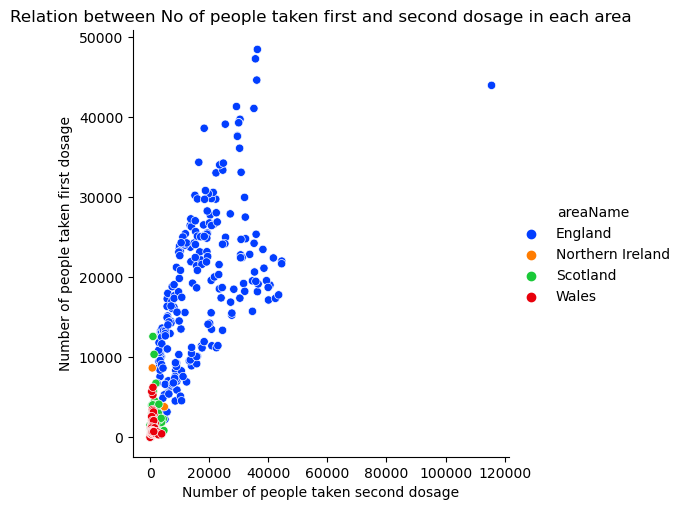

In [10]:
'''creating a scatter plot showing the number of people 
                who took first and second dose in each area'''

ax=sns.relplot(x='FirstDose',y='SecondDose', hue='areaName',
               palette="bright", data=df)
# add x/y labels
ax.set(xlabel='Number of people taken second dosage',
       ylabel='Number of people taken first dosage', 
       title='Relation between No of people taken'
       ' first and second dosage in each area')

1. The graphs states the relationship between number of pwople taken the first dosage and second dosage in each area in United Kingdom.
2. More vaccination has been taken in England compare to other areas and the  graph is also following a strong correlation.
3. We can conclude from above graph that people in England tend to be more concerned on their health and people who have taken their first dose are also taking their second dosage.

### 4. Display unique values of a categorical variable and their frequencies.

In [11]:
# The Vaccinations counts in each quarter
UniqueValues=df['Quarter'].unique()
print(f"The Quarter in which vaccinations"
      f" were taken are: {UniqueValues}")
VaccineCounts=df['Quarter'].value_counts()
print(f"The vaccination count in each"
      f" quarter are as follows:\n {VaccineCounts}")


The Quarter in which vaccinations were taken are: ['Q2' 'Q1' 'Q4']
The vaccination count in each quarter are as follows:
 Q1    359
Q4    328
Q2    203
Name: Quarter, dtype: int64


Text(0.5, 1.0, 'Distribution of each quarter of the year 2021 and 2022')

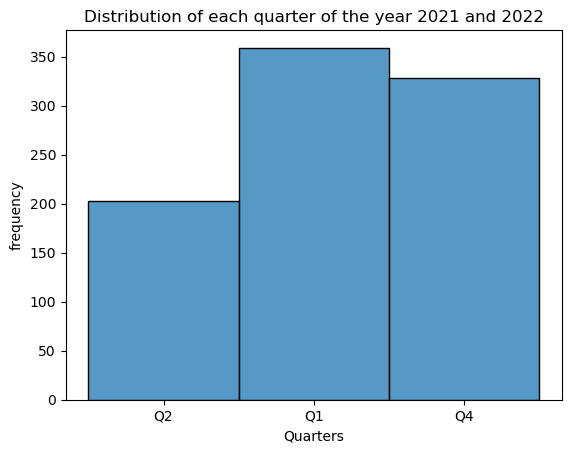

In [12]:
'''plotting the distribution of number of vaccinations taken in 
            each quarters in the year 2021 and 2022 using Seaborn''' 

sns.histplot(df['Quarter'], bins=20)
# add x/y labels
plt.xlabel("Quarters") 
plt.ylabel("frequency")
# add title
plt.title("Distribution of each quarter of the year 2021 and 2022")

1. The above graph shows the frequency distribution of number of vaccination taken on each quarters of the year 2021 and 2022.
2. The number of people who have taken vaccination on Q1 tends to be higher with a frequency of 359, followed by Q2, Q4 with frequencies of 203 and 328 respectively.
3. In Q3, no one has taken vaccinations across UK.

### 5. Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them and interpret the results.

In [13]:
# import library for performing statistical analysis
from scipy import stats

In [14]:
# create contigency table with areaname and quarter
con_table = pd.crosstab(df['areaName'], df['Quarter']) 
print(con_table) 

Quarter           Q1  Q2  Q4
areaName                    
England           90  53  92
Northern Ireland  89  53  91
Scotland          90  49  79
Wales             90  48  66


<Axes: xlabel='areaName'>

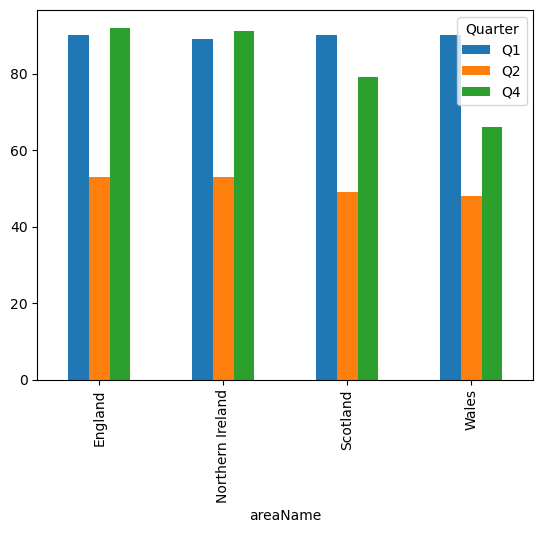

In [15]:
#Plots graph based on contingency table
con_table.plot(kind='bar',stacked=False)

1. The above graph states about the number of people who took vaccination in different places across United Kingdom in all 4 quarters of the year.
2. In England, the number of people who have taken vaccination are higher in Q4, followed by in Q1, Q2 and Q3 respectively. Northern Ireland follows same trend as England.
3. In Scotland and Wales, more vaccination was taken in Q1, followed by Q4 and Q2.


In [16]:
# statistical test - chi-square test
chi2, p_val, dof, expected=stats.chi2_contingency(con_table)

In [17]:
#printing p value and interpretation
print(f"p-value: {p_val}")
if p_val<0.05:
    print(f"We reject the null hypothesis as p-value {p_val}"
          " is less than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p-value {p_val}" 
          " is greater than 0.05")


p-value: 0.7925789480239712
We fail to reject the null hypothesis as p-value 0.7925789480239712 is greater than 0.05


The p-value (0.1855) obtained from statistical test of independence is greater that 0.05, this states that we fail to reject the null hypothesis and the categorical variables quarter and areaName are independent.

### 6. Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).

In [18]:
# 1st subset with criteria of vaccination done on 
    #quarter 1 and its a working day
df1= df[(df['WorkingDay'] == 'Yes') & (df['Quarter'] == 'Q1')]
df1.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
53,England,E92000001,2022.0,3,Q1,Thu,Yes,3530.0,10881.0,13692.0
54,England,E92000001,2022.0,3,Q1,Wed,Yes,3503.0,11249.0,14052.0
55,England,E92000001,2022.0,3,Q1,Tue,Yes,3559.0,10148.0,12642.0
56,England,E92000001,2022.0,3,Q1,Mon,Yes,2994.0,9500.0,11974.0
59,England,E92000001,2022.0,3,Q1,Fri,Yes,3654.0,11943.0,14656.0


This data is about the number of people taken vaccination in quarter 1 (Q1) during a working day. The descriptive statistics is obtained for the same.

In [19]:
# Descriptive statistics
df1.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,256.0,256.00000,256.000000,256.000000,256.000000
mean,2022.0,2.03125,2777.207031,5504.664062,13708.968750
std,0.0,0.83019,4862.766291,8505.746566,28569.086873
min,2022.0,1.00000,0.000000,0.000000,0.000000
25%,2022.0,1.00000,237.000000,434.750000,1650.500000
50%,2022.0,2.00000,564.000000,845.500000,3999.500000
75%,2022.0,3.00000,3003.000000,7442.750000,14716.500000
max,2022.0,3.00000,22307.000000,33056.000000,199810.000000


1. The average number of people who have taken first dosage, second dosage and third dosage in quarter 1(Q1) during a working day is 2777; 5505; 13,709 respectively (the mean values are rounded up as number of people cannot be with decimal values)
2. It is positively skewed as mean value is higher than median value.
3. In 2022, the maximum vaccines were taken in the month of march and minimum vaccines at January.

In [20]:
# 1st subset with criteria of vaccination done on quarter 1 in England
df2= df[(df['areaName'] == 'England') & (df['Quarter'] == 'Q1')]
df2.head()

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
53,England,E92000001,2022.0,3,Q1,Thu,Yes,3530.0,10881.0,13692.0
54,England,E92000001,2022.0,3,Q1,Wed,Yes,3503.0,11249.0,14052.0
55,England,E92000001,2022.0,3,Q1,Tue,Yes,3559.0,10148.0,12642.0
56,England,E92000001,2022.0,3,Q1,Mon,Yes,2994.0,9500.0,11974.0
57,England,E92000001,2022.0,3,Q1,Sun,No,2363.0,6781.0,6366.0


In [21]:
#descriptive statistics
df2.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,90.0,90.000000,90.000000,90.000000,90.000000
mean,2022.0,2.000000,9716.422222,19072.755556,41625.133333
std,0.0,0.834643,6081.817286,7811.600452,45317.807403
min,2022.0,1.000000,2203.000000,2684.000000,6366.000000
25%,2022.0,1.000000,4092.000000,12755.500000,16093.250000
50%,2022.0,2.000000,8118.500000,17851.000000,23614.000000
75%,2022.0,3.000000,13946.500000,24319.500000,45082.250000
max,2022.0,3.000000,29231.000000,41351.000000,206676.000000


1. The average number of people who have taken first, second and third dose in England during quarter 1 is 9716.42; 19072.75 and 41615.13.
2. The maximum vaccination was taken on march 2022.

### 7. Conduct a statistical test of the significance of the difference between the means of two subsets of the data and interpret the results.

In [22]:
# subset m1 hs data of Number of people who have taken first dosage
m1 = df['FirstDose']
# subset m1 hs data of Number of people who have taken second dosage
m2 = df['SecondDose']

In [23]:
v1=m1.mean()     # Mean of m1
v2=m2.mean()     # Mean of m2
# Display the mean values of m1 and m2
print(f"Mean value of subset 1: {v1} and Mean value of subset 2: {v2}")

Mean value of subset 1: 5007.202247191011 and Mean value of subset 2: 5598.837078651685


In [24]:
# Statistical test for differnece between 2 means
t_val, p_value=stats.ttest_ind(m1,m2)
# Displays the t and p value found
print(f"t-value: {t_val}, p-value: {p_value}")
if p_value<0.05:
    print(f"We reject the null hypothesis as p-value {p_value}"
    " is less than 0.05")
else:
    print(f"We fail to reject the null hypothesis as p-value {p_value}"
          " is greater than 0.05")

t-value: -1.324221356439918, p-value: 0.18559973999546153
We fail to reject the null hypothesis as p-value 0.18559973999546153 is greater than 0.05


The obtained p value from statistical test p-value: 0.1855 is greater than 𝛼 (0.05), hence we fail to reject the null hypothesis and conclude that there is difference between the means of both subset.

### 8. Create one or more tables that group the data by a certain categorical variable and display summarized information for each group (e.g., the mean or sum within the group).

In [25]:
'''table 1 - The average of number of first,
        second and third dose by each quarter'''
dose_quarter = df.groupby('Quarter')[['FirstDose','SecondDose',
                                      'ThirdDose']].mean().reset_index()
print(dose_quarter)

  Quarter    FirstDose   SecondDose     ThirdDose
0      Q1  2849.724234  5608.415042  13164.225627
1      Q2  3118.315271  2395.266010   4060.669951
2      Q4  8537.625000  7571.051829  99352.807927


1. In Q1, An average of 2850 number of people took first dosage, 5608 people have taken second dosage and 13,614 number of people have taken third dosage.
2. Similarly in Q2 and Q4, the number of people who have taken first dosage are 3,118 and 8,537. Second dosage are 2395 and 7571. Third dosage are 4061 ans 99353.
3. In Overall, the number of people who have taken all three types of dosage were more in Q4.

In [26]:
'''table 2 - The average of number of first, 
                    second and third dose by each year'''
dose_Month = df.groupby('year')[['FirstDose','SecondDose',
                                 'ThirdDose']].mean().reset_index()
print(dose_Month)

     year    FirstDose   SecondDose     ThirdDose
0  2021.0  8537.625000  7571.051829  99352.807927
1  2022.0  2946.741993  4447.793594   9875.930605


1. The number of people who have taken all three types of dosages are higher in the year 2021.
2. In 2021, 8,538 number of people have taken first dosage, 7571 have taken second dosage and 99353 have taken third dosage.
3. Similarly in 2022, the number of people who have taken first, second and third dosages are 2947, 4448 and 9876 respectively.

### 9. Implement a linear regression model and interpret its output including its accuracy

In [27]:
# import library for linear regression
import statsmodels.api as sm
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show
# FirstDose and SecondDose - Independent var
# ThirdDose - Dependent Var
# to predict how number of people who have taken
    #is impacted based on month of the year

Loading BokehJS ...

In this linear regression model, we predict that how the number of people getting their third dose vaccinated is impacted based on the first and second dose vaccinated. ThirdDose is the dependent variable (Y), FirstDose and Second Dose is the independent variable (X).

In [28]:
fig = figure(height=400, width=400,
             title="Third Dose Vs (FirstDose and Second Dose)", 
             x_axis_label='First and Second Dose', 
             y_axis_label='Third Dose')
# To combine both independent variable for plotting
vaccination = df['FirstDose'] + df['SecondDose']
# plotting scatter plot between dependent and independent variable
fig.circle(vaccination,df['ThirdDose'])
show(fig)

In [29]:
# Perform the correlation
vaccination.corr(df['ThirdDose'], method='pearson')


0.8055505627387312

The correlation coefficient is greater than 0 so it has a positive relation between number of people who have taken third dosage  and Number of people who have taken first and second dosage of vaccination

In [30]:
#Building Ordinary Least Square model
model = sm.OLS.from_formula('ThirdDose ~ FirstDose + SecondDose',
                            data=df).fit()

In [31]:
# Calculate Intercept and coefficient
model.params

Intercept    -7049.629599
FirstDose        4.655133
SecondDose       4.749578
dtype: float64

In [32]:
# the summary of linear regression test
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ThirdDose   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     819.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.45e-202
Time:                        01:58:10   Log-Likelihood:                -11089.
No. Observations:                 890   AIC:                         2.218e+04
Df Residuals:                     887   BIC:                         2.220e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7049.6296   2452.926     -2.874      0.004   -1.19e+04   -2235.414
FirstDose      4.6551      0.392     11.867      0.000       3.885       5.425
SecondDose     4.7496      0.413     11.502      0.000       3.939       5.560
==============================================================================
Omnibus:                      530.004   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12014.269
Skew:                           2.263   Prob(JB):                         0.00
Kurtosis:                      20.421   Cond. No.                     1.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coeffecients of intercept is -7049.6296 and of FirstDose is 4.6551 and second dose is 4.7496. Thus $ThirdDose = -7049.6296 + 4.6551*FirstDose + 4.7496*SecondDose + e$

The p-value of the intercept is 0.004 which is less than 0.05, hence it has a significant effect on the dependent variable.

1. The R square value is 0.649, which indicates that the first dosage and second dosage variable is good predictor of the dependent variable third dose.
2. About 64% of third dose data can be predicted by first dose and second dose variable data, this indicates a moderate relation between the variables.

In [33]:
#plot standarsized residual graph
fig = figure(height=400, width=400,
             title="Standardized Residuals Vs Fitted Values", 
             x_axis_label='fitted values', 
             y_axis_label='standardized residuals')

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

1. Zero mean of residuals: From the above graph we can state that the residuals are scattered around the zero line.
2. Normality of distribution of residuals: The below histogram states that the residuals are normally distributed with one outliner around 8.

In [34]:
# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, density=True, bins=10)

In [35]:
fig = figure(height=400, width=400,
             title="Distribution of Standardized Residuals",
             x_axis_label='St_resids', y_axis_label='frequency')
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
         line_color="black")

show(fig)

## Conclusion

1. The analysis was conducted with around 900 datarows.
2. The data is positively skewed which states that as number of people who have taken first dosage increase it more likely to increase the number of people to take the second dosage. 
3. The Maximum number of vaccinations was taken in December 2022 and Minimum was taken in January 2021.


4. The number of people who have taken Vaccination are more in England compared to other areas.
5. The maximum number of vaccination was taken in quarter Q1, then Q4 followed by Q3.


6. The Linear regression model is significant based p-value obtained, but R-Square states that number of people who have taken first and second dose is useful to predict 64% of number of people who have taken third dose.